## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 2.x selected.
2.1.0


In [0]:
from google.colab import drive
import pandas as pd
import numpy as np
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
#Importing required keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session
from tensorflow.keras.layers import Reshape, Dense, Dropout, BatchNormalization, Activation, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

In [3]:
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "/content/drive/My Drive/GreatLearning/myprojects/Residency8/DogBreed_Classification/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'test.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'sample_submission.csv.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'labels.csv.zip', 'r') as z:
  z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
labels = pd.read_csv('/content/labels.csv')

### Print the count of each category of Dogs given in the dataset



In [10]:
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [11]:
labels.breed.value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
briard                   66
eskimo_dog               66
Name: breed, Length: 120, dtype: int64

### Get one-hot encodings of labels

In [0]:
targets = pd.Series(labels.breed)

In [0]:
one_hot = pd.get_dummies(targets, sparse = True)

In [0]:
one_hot_labels = np.asarray(one_hot)

In [19]:
one_hot_labels[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [20]:
one_hot_labels[0].shape

(120,)

In [21]:
le = LabelEncoder()
integer_encoded = le.fit_transform(labels.breed)
print(integer_encoded)

[19 37 85 ...  3 75 28]


In [22]:
import keras
y = tf.keras.utils.to_categorical(integer_encoded, num_classes = None, dtype = 'int')

Using TensorFlow backend.


In [23]:
y[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [24]:
img_rows = 128
img_cols = 128
x_train_data = []
y_train_data = []

for f, img in tqdm(labels.values): # f for format, jpg
  train_img = cv2.imread('./train/{}.jpg'.format(f),1)
  train_img_resize = cv2.resize(train_img, (img_rows, img_cols))
  x_train_data.append(train_img_resize)
  y_train_data.append(img)

100%|██████████| 10222/10222 [00:31<00:00, 325.15it/s]


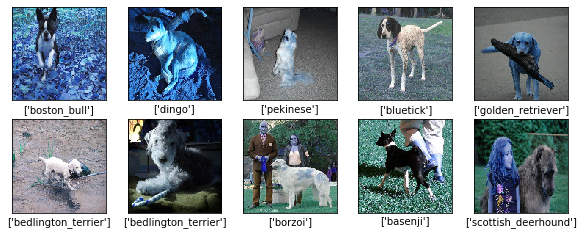

In [25]:
#plotting first 10 images in training sample
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_data[i])
    plt.xlabel([y_train_data[i]])
plt.show()

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [0]:
#Converting fetched dataset into numpy array of data type float32 for compatibility with Keras
x_train_data_float = np.array(x_train_data).astype('float32')

In [0]:
x_train_data_norm = x_train_data_float/255.0

In [28]:
x_train_data_norm.dtype

dtype('float32')

In [29]:
x_train_data_norm.shape

(10222, 128, 128, 3)

In [0]:
le = LabelEncoder()
y_train_le = le.fit_transform(y_train_data)

In [0]:
y_train_cat = tf.keras.utils.to_categorical(y_train_le)

In [32]:
y_train_cat[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32)

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [33]:
# split x_train and y_train into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train_data_norm, y_train_cat, test_size=0.25, random_state=2)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(7666, 128, 128, 3)
(2556, 128, 128, 3)
(7666, 120)
(2556, 120)


### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [0]:
test_data = pd.read_csv('/content/sample_submission.csv')

In [35]:
test_data.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333

In [36]:
test_data.shape

(10357, 121)

In [0]:
test_img = test_data.id

In [38]:
test_img.values

array(['000621fb3cbb32d8935728e48679680e',
       '00102ee9d8eb90812350685311fe5890',
       '0012a730dfa437f5f3613fb75efcd4ce', ...,
       'fff74b59b758bbbf13a5793182a9bbe4',
       'fff7d50d848e8014ac1e9172dc6762a3',
       'fffbff22c1f51e3dc80c4bf04089545b'], dtype=object)

Run the below code to load the test image files in x_test_feature

In [39]:
x_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img.values): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 1)
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)

100%|██████████| 10357/10357 [00:30<00:00, 336.06it/s]


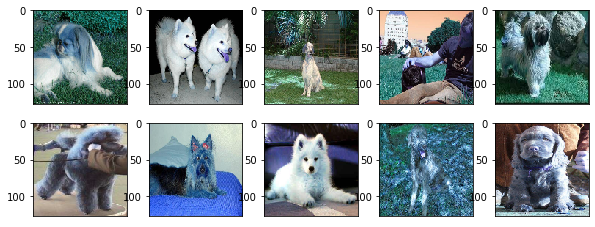

In [40]:
#plotting first 10 images in training sample
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.grid(False)
    plt.imshow(x_test_feature[i])
plt.show()

Normalize the test data and convert it into 4 dimensions

In [41]:
x_test_feature_float = np.array(x_test_feature).astype('float32')
x_test_feature_norm = x_test_feature_float/255.0
print('dtype of x_test_feature:',x_test_feature_norm.dtype)
print('Shape of x_test_feature: ',x_test_feature_norm.shape)

dtype of x_test_feature: float32
Shape of x_test_feature:  (10357, 128, 128, 3)


### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [0]:
clear_session()
# Initializing the CNN model
model = Sequential()

#normalize data
model.add(BatchNormalization(input_shape=(128,128,3,),name='input'))

#Add first convolutional layer
model.add(Conv2D(32, #Number of filters 
                kernel_size=(5,5), #Size of the filter
                activation='relu', name = 'conv_1'))

#Add second convolutional layer
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', name = 'conv_2'))

#Add Fully Connected Layer with 256 units and activation function as 'ReLU'
model.add(Dense(256, activation='relu',name='dense_1'))

#Flatten the output
model.add(Flatten())

# Adding the output layer using softmax as activation function
model.add(Dense(units=120, activation = 'softmax', name = 'output'))

In [0]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (BatchNormalization)   (None, 128, 128, 3)       12        
_________________________________________________________________
conv_1 (Conv2D)              (None, 124, 124, 32)      2432      
_________________________________________________________________
conv_2 (Conv2D)              (None, 122, 122, 64)      18496     
_________________________________________________________________
dense_1 (Dense)              (None, 122, 122, 256)     16640     
_________________________________________________________________
flatten (Flatten)            (None, 3810304)           0         
_________________________________________________________________
output (Dense)               (None, 120)               457236600 
Total params: 457,274,180
Trainable params: 457,274,174
Non-trainable params: 6
__________________________________________

### Use batch_size = 128 and epochs = 10 and execute the model

In [42]:
model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=128, epochs=10)

Train on 7666 samples, validate on 2556 samples
Epoch 1/10
7666/7666 [==============================] - 29s 4ms/sample - loss: 16.0011 - accuracy: 0.0107 - val_loss: 4.7873 - val_accuracy: 0.0090
Epoch 2/10
7666/7666 [==============================] - 20s 3ms/sample - loss: 4.7846 - accuracy: 0.0170 - val_loss: 4.7872 - val_accuracy: 0.0121
Epoch 3/10
7666/7666 [==============================] - 20s 3ms/sample - loss: 4.7425 - accuracy: 0.0254 - val_loss: 4.7684 - val_accuracy: 0.0164
Epoch 4/10
7666/7666 [==============================] - 20s 3ms/sample - loss: 3.1460 - accuracy: 0.3827 - val_loss: 4.8391 - val_accuracy: 0.0258
Epoch 5/10
7666/7666 [==============================] - 20s 3ms/sample - loss: 0.3273 - accuracy: 0.9464 - val_loss: 6.7992 - val_accuracy: 0.0258
Epoch 6/10
7666/7666 [==============================] - 20s 3ms/sample - loss: 0.0604 - accuracy: 0.9962 - val_loss: 7.5870 - val_accuracy: 0.0282
Epoch 7/10
7666/7666 [==============================] - 20s 3ms/sampl

In [43]:
#Validating the model on validation set
score = model.evaluate(x_val, y_val)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

2556/2556 [==============================] - 3s 1ms/sample - loss: 8.1675 - accuracy: 0.0274
Validation loss: 8.167544445521395
Validation accuracy: 0.02738654


#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,
                                                               width_shift_range=0.2,
                                                               height_shift_range=0.2,
                                                               rotation_range=30,
                                                               shear_range=0.2,
                                                               zoom_range=0.3)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,
                                                               width_shift_range=0.2,
                                                               height_shift_range=0.2,
                                                               rotation_range=30,
                                                               shear_range=0.2,
                                                               zoom_range=0.3)

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
#Build training generator. 
train_generator = train_datagen.flow(x_train, y_train, batch_size=128)

In [0]:
#Build val generator
val_generator = val_datagen.flow(x_val, y_val, batch_size=128)

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [0]:
#Saving the best model using model checkpoint callback
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('dog_breed.h5', 
                                                    save_best_only=True, 
                                                    monitor='val_accuracy', 
                                                    mode='max', 
                                                    verbose=1)

In [48]:
model.fit_generator(train_generator,
                    epochs=10,
                    steps_per_epoch= x_train.shape[0]//128,  #Number of training images//batch_size
                    validation_data=val_generator,
                    validation_steps = x_val.shape[0]//128, #Number of test images//batch_size
                    callbacks = [model_checkpoint])

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 59 steps, validate for 19 steps
Epoch 1/10
58/59 [============================>.] - ETA: 0s - loss: 4.8703 - accuracy: 0.0144
Epoch 00001: val_accuracy improved from -inf to 0.00946, saving model to dog_breed.h5
59/59 [==============================] - 148s 3s/step - loss: 4.8688 - accuracy: 0.0142 - val_loss: 4.7662 - val_accuracy: 0.0095
Epoch 2/10
58/59 [============================>.] - ETA: 0s - loss: 4.7579 - accuracy: 0.0171
Epoch 00002: val_accuracy improved from 0.00946 to 0.01562, saving model to dog_breed.h5
59/59 [==============================] - 147s 2s/step - loss: 4.7583 - accuracy: 0.0176 - val_loss: 4.7685 - val_accuracy: 0.0156
Epoch 3/10
58/59 [============================>.] - ETA: 0s - loss: 4.7265 - accuracy: 0.0206
Epoch 00003: val_accuracy improved from 0.01562 to 0.01850, saving model to dog_breed.h5
59/59 [===================

In [49]:
#Validating the model on validation set
score = model.evaluate(x_val, y_val)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

2556/2556 [==============================] - 3s 1ms/sample - loss: 4.4751 - accuracy: 0.0442
Validation loss: 4.475081661684039
Validation accuracy: 0.044209704


# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

Defining project path for vgg weight file

In [0]:
project_path_vgg = "/content/drive/My Drive/GreatLearning/myprojects/Residency8/"

In [0]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=(project_path_vgg+'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, input_shape=(224,224,3), pooling='avg')

Print the summary of the base_model

In [13]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

From above summary base model, layers are as follows:
Input layer, block1(2 x Conv layer, 1 x MaxPooling) + block2(2 x Conv layer,1 x MaxPooling) + block3(3 x Conv layer,1 x MaxPooling) + block4(3 x Conv layer,1 x MaxPooling) + block5(3 x Conv layer,1 x MaxPooling) + 1 x GlobalAveragePooling.

There are total 14,714,688 Trainable parameters and no Non-trainable parameters

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

Storing the output of base model

In [0]:
#get Output layer of Pre-trained model
x = base_model.output

Adding flatten and dense layers on top of base model

In [0]:
#Add Flatten layer
x = Flatten()(x)

#Add Fully Connected Layer with 1024 units and activation function as 'ReLU'
x = Dense(1024, activation='relu')(x)

#Add Fully Connected Layer with 256 units and activation function as 'ReLU'
x = Dense(256, activation='relu')(x)

# Adding the output layer using softmax as activation function
prediction = Dense(units=120, activation = 'softmax')(x)

### Make all the layers in the base_model (VGG16) to be non-trainable

Setting the layers for base_model as non-trainable

In [0]:
#Set pre-trained model layers to not trainable
for layer in base_model.layers:
    layer.trainable = False

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

Compiling final model

In [0]:
#Using Keras Model class
final_model = tf.keras.models.Model(inputs=base_model.input, #Pre-trained model input as input layer
                                    outputs=prediction) #Output layer added

In [0]:
#Compile the model
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
#Summary of final model
final_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

From final model summary, it can be clearly seen that non-trainable parameters is same as total parameters in base model and trainable parameters is sum of paramters in add-on model.

Using model checkpoint callback to save best model

In [0]:
#Saving the best model using model checkpoint callback
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('dog_breed1.h5', 
                                                    save_best_only=True, 
                                                    monitor='val_accuracy', 
                                                    mode='max', 
                                                    verbose=1)

Resizing the images for input to VGG16 model (224,224,3)

In [21]:
img_rows1 = 224
img_cols1 = 224
x_train1_data = []
y_train1_data = []

for f, img in tqdm(labels.values): # f for format, jpg
  train_img = cv2.imread('./train/{}.jpg'.format(f),1)
  train_img_resize = cv2.resize(train_img, (img_rows1, img_cols1))
  x_train1_data.append(train_img_resize)
  y_train1_data.append(img)

100%|██████████| 10222/10222 [00:34<00:00, 287.06it/s]


Preprocessing of the training data and splitting into training and validation set

In [0]:
#Converting fetched dataset into numpy array of data type float32 for compatibility with Keras
x_train1_data_float = np.array(x_train1_data).astype('float32')

In [0]:
x_train1_data_norm = x_train1_data_float/255.0 # Normalizing training data
x_train1_data_norm.dtype
x_train1_data_norm.shape
le = LabelEncoder()
y_train1_le = le.fit_transform(y_train1_data)
y_train1_cat = tf.keras.utils.to_categorical(y_train1_le)
# split x_train1 and y_train1 into training and validation sets
x_train1, x_val1, y_train1, y_val1 = train_test_split(x_train1_data_norm, y_train1_cat, test_size=0.25, random_state=2)

Printing shapes of training and validation set

In [24]:
print(x_train1.shape)
print(x_val1.shape)
print(y_train1.shape)
print(y_val1.shape)

(7666, 224, 224, 3)
(2556, 224, 224, 3)
(7666, 120)
(2556, 120)


Training the model

In [25]:
final_model.fit(x_train1, y_train1, validation_data=(x_val1, y_val1), batch_size=128, epochs=10)

Train on 7666 samples, validate on 2556 samples
Epoch 1/10
7666/7666 [==============================] - 36s 5ms/sample - loss: 4.7566 - accuracy: 0.0194 - val_loss: 4.6707 - val_accuracy: 0.0372
Epoch 2/10
7666/7666 [==============================] - 23s 3ms/sample - loss: 4.4246 - accuracy: 0.0520 - val_loss: 4.2120 - val_accuracy: 0.0677
Epoch 3/10
7666/7666 [==============================] - 23s 3ms/sample - loss: 3.8915 - accuracy: 0.1028 - val_loss: 3.7304 - val_accuracy: 0.1279
Epoch 4/10
7666/7666 [==============================] - 23s 3ms/sample - loss: 3.4675 - accuracy: 0.1714 - val_loss: 3.4453 - val_accuracy: 0.1530
Epoch 5/10
7666/7666 [==============================] - 23s 3ms/sample - loss: 3.1488 - accuracy: 0.2237 - val_loss: 3.2082 - val_accuracy: 0.1948
Epoch 6/10
7666/7666 [==============================] - 23s 3ms/sample - loss: 2.9084 - accuracy: 0.2618 - val_loss: 3.0354 - val_accuracy: 0.2285
Epoch 7/10
7666/7666 [==============================] - 23s 3ms/sample

In [27]:
#Validating the model on validation set
training_score = final_model.evaluate(x_train1, y_train1)
print('Training loss:', training_score[0])
print('Training accuracy:', training_score[1])
validation_score = final_model.evaluate(x_val1, y_val1)
print('Validation loss:', validation_score[0])
print('Validation accuracy:', validation_score[1])

7666/7666 [==============================] - 19s 2ms/sample - loss: 2.2358 - accuracy: 0.4089
Training loss: 2.2357597535190834
Training accuracy: 0.4089486
2556/2556 [==============================] - 7s 3ms/sample - loss: 2.7122 - accuracy: 0.2856
Validation loss: 2.712161684633234
Validation accuracy: 0.2856025


With batch size of 128 and 10 epochs, training accuracy and validation accuracy is printed above.
Apparently, with more number of epochs, model should learn better and validation accuracy may be improved.

Adding some variations in above model to improve the accuracy.

First checking with increasing epoch to 100 and batch size of 128

In [0]:
#Using Keras Model class
final_model1 = tf.keras.models.Model(inputs=base_model.input, #Pre-trained model input as input layer
                                    outputs=prediction) #Output layer added

#Compile the model
final_model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 

In [34]:
final_model1.fit(x_train1, y_train1, validation_data=(x_val1, y_val1), batch_size=128, epochs=100)

Train on 7666 samples, validate on 2556 samples
Epoch 1/100
7666/7666 [==============================] - 24s 3ms/sample - loss: 4.7457 - accuracy: 0.0219 - val_loss: 4.6496 - val_accuracy: 0.0391
Epoch 2/100
7666/7666 [==============================] - 23s 3ms/sample - loss: 4.3973 - accuracy: 0.0530 - val_loss: 4.2024 - val_accuracy: 0.0696
Epoch 3/100
7666/7666 [==============================] - 23s 3ms/sample - loss: 3.9030 - accuracy: 0.1118 - val_loss: 3.7516 - val_accuracy: 0.1393
Epoch 4/100
7666/7666 [==============================] - 23s 3ms/sample - loss: 3.4760 - accuracy: 0.1688 - val_loss: 3.4065 - val_accuracy: 0.1643
Epoch 5/100
7666/7666 [==============================] - 23s 3ms/sample - loss: 3.1603 - accuracy: 0.2086 - val_loss: 3.2658 - val_accuracy: 0.1894
Epoch 6/100
7666/7666 [==============================] - 23s 3ms/sample - loss: 2.9297 - accuracy: 0.2593 - val_loss: 3.0759 - val_accuracy: 0.2203
Epoch 7/100
7666/7666 [==============================] - 23s 3ms

From above, with 128 batch size and 100 epochs, model seems to overfit as training accuracy is going very high but validation accuracy is significantly less as than training accuracy 

To avoid overfitting, adding batch normalization after every dense layer and dropout layer before output layer in the add-on model to base model

In [0]:
#get Output layer of Pre-trained model
x = base_model.output

#Add Flatten layer
x = Flatten()(x)

#Add Fully Connected Layer with 1024 units and activation function as 'ReLU'
x = Dense(1024, activation='relu')(x)

# BatchNormalization layer
x = BatchNormalization()(x)

#Add Fully Connected Layer with 256 units and activation function as 'ReLU'
x = Dense(256, activation='relu')(x)

# BatchNormalization layer
x = BatchNormalization()(x)

#Add Dropout
x = Dropout(0.5)(x)

# Adding the output layer using softmax as activation function
prediction = Dense(units=120, activation = 'softmax')(x)

#Set pre-trained model layers to not trainable
for layer in base_model.layers:
    layer.trainable = False
	
#Using Keras Model class
final_model2 = tf.keras.models.Model(inputs=base_model.input, #Pre-trained model input as input layer
                                    outputs=prediction) #Output layer added
									
#Compile the model
final_model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
#Summary of final model
final_model2.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [38]:
final_model2.fit(x_train1, y_train1, validation_data=(x_val1, y_val1), batch_size=128, epochs=100)

Train on 7666 samples, validate on 2556 samples
Epoch 1/100
7666/7666 [==============================] - 25s 3ms/sample - loss: 4.8879 - accuracy: 0.0543 - val_loss: 4.5933 - val_accuracy: 0.0477
Epoch 2/100
7666/7666 [==============================] - 23s 3ms/sample - loss: 3.5674 - accuracy: 0.1773 - val_loss: 4.2718 - val_accuracy: 0.1060
Epoch 3/100
7666/7666 [==============================] - 23s 3ms/sample - loss: 2.9757 - accuracy: 0.2750 - val_loss: 3.9023 - val_accuracy: 0.1565
Epoch 4/100
7666/7666 [==============================] - 23s 3ms/sample - loss: 2.6062 - accuracy: 0.3422 - val_loss: 3.6847 - val_accuracy: 0.1808
Epoch 5/100
7666/7666 [==============================] - 23s 3ms/sample - loss: 2.3322 - accuracy: 0.3967 - val_loss: 3.4371 - val_accuracy: 0.2281
Epoch 6/100
7666/7666 [==============================] - 23s 3ms/sample - loss: 2.1359 - accuracy: 0.4448 - val_loss: 3.2132 - val_accuracy: 0.2469
Epoch 7/100
7666/7666 [==============================] - 23s 3ms

Adding Batch Normalization and Dropout layer as final_model2 does seem to have much effect on overfitting for this dataset.

Trying below additional dropout layer before last dense layers and unfreeze one convolutional layer for training in base model

In [39]:
len(base_model.layers)

20

In [42]:
base_model.layers[0:5]

there are 20 layers in base model

Unfreezing first convolutional layer in base model to have less impact on computational processing as this layer is having least number of trainable parameters.

In [0]:
#get Output layer of Pre-trained model
x = base_model.output

#Add Flatten layer
x = Flatten()(x)

#Add Fully Connected Layer with 1024 units and activation function as 'ReLU'
x = Dense(1024, activation='relu')(x)

# BatchNormalization layer
x = BatchNormalization()(x)

#Add Dropout
x = Dropout(0.5)(x)

#Add Fully Connected Layer with 256 units and activation function as 'ReLU'
x = Dense(256, activation='relu')(x)

# BatchNormalization layer
x = BatchNormalization()(x)

#Add Dropout
x = Dropout(0.5)(x)

# Adding the output layer using softmax as activation function
prediction = Dense(units=120, activation = 'softmax')(x)

#Set pre-trained model layers to not trainable
for layer in base_model.layers:
    layer.trainable = False
    base_model.layers[1].trainable = True

In [0]:
#Using Keras Model class
final_model3 = tf.keras.models.Model(inputs=base_model.input, #Pre-trained model input as input layer
                                    outputs=prediction) #Output layer added
									
#Compile the model
final_model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
#Summary of final model
final_model3.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

From above summary, it can be confirmed that trainable parameters have increased by 1792 which is the number of params in first convolutional layer in base model

In [56]:
final_model3.fit(x_train1, y_train1, validation_data=(x_val1, y_val1), batch_size=128, epochs=50)

Train on 7666 samples, validate on 2556 samples
Epoch 1/50
7666/7666 [==============================] - 42s 5ms/sample - loss: 4.5665 - accuracy: 0.0805 - val_loss: 4.3728 - val_accuracy: 0.1193
Epoch 2/50
7666/7666 [==============================] - 40s 5ms/sample - loss: 3.0232 - accuracy: 0.2558 - val_loss: 3.8763 - val_accuracy: 0.2238
Epoch 3/50
7666/7666 [==============================] - 40s 5ms/sample - loss: 2.4291 - accuracy: 0.3628 - val_loss: 3.2900 - val_accuracy: 0.3568
Epoch 4/50
7666/7666 [==============================] - 40s 5ms/sample - loss: 2.0382 - accuracy: 0.4400 - val_loss: 2.7390 - val_accuracy: 0.4589
Epoch 5/50
7666/7666 [==============================] - 40s 5ms/sample - loss: 1.7997 - accuracy: 0.5035 - val_loss: 2.1887 - val_accuracy: 0.5196
Epoch 6/50
7666/7666 [==============================] - 40s 5ms/sample - loss: 1.6007 - accuracy: 0.5447 - val_loss: 1.7909 - val_accuracy: 0.5681
Epoch 7/50
7666/7666 [==============================] - 40s 5ms/sample

As an attempt to further improve accuracy, unfreezing only second convolutional layer in next model and increase dense layers (add two dense layers) with batch normalization.

In [0]:
#get Output layer of Pre-trained model
x = base_model.output

#Add Flatten layer
x = Flatten()(x)

#Add Fully Connected Layer with 1024 units and activation function as 'ReLU'
x = Dense(1024, activation='relu')(x)

# BatchNormalization layer
x = BatchNormalization()(x)

#Add Dropout
x = Dropout(0.5)(x)

#Add Fully Connected Layer with 256 units and activation function as 'ReLU'
x = Dense(256, activation='relu')(x)

# BatchNormalization layer
x = BatchNormalization()(x)

#Add Fully Connected Layer with 64 units and activation function as 'ReLU'
x = Dense(64, activation='relu')(x)

# BatchNormalization layer
x = BatchNormalization()(x)

#Add Dropout
x = Dropout(0.5)(x)

# Adding the output layer using softmax as activation function
prediction = Dense(units=120, activation = 'softmax')(x)

#Set pre-trained model layers to not trainable
for layer in base_model.layers:
    layer.trainable = False
    base_model.layers[2].trainable = True

In [0]:
#Using Keras Model class
final_model4 = tf.keras.models.Model(inputs=base_model.input, #Pre-trained model input as input layer
                                    outputs=prediction) #Output layer added
									
#Compile the model
final_model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [59]:
#Summary of final model
final_model4.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

From above summary, trainable parameters has been increased to 36928 due to unfreezing of second convolutional layer in base model.

In [60]:
final_model4.fit(x_train1, y_train1, validation_data=(x_val1, y_val1), batch_size=128, epochs=10)

Train on 7666 samples, validate on 2556 samples
Epoch 1/10
7666/7666 [==============================] - 43s 6ms/sample - loss: 4.7691 - accuracy: 0.0404 - val_loss: 4.5752 - val_accuracy: 0.0751
Epoch 2/10
7666/7666 [==============================] - 41s 5ms/sample - loss: 3.7697 - accuracy: 0.1470 - val_loss: 4.1989 - val_accuracy: 0.1569
Epoch 3/10
7666/7666 [==============================] - 41s 5ms/sample - loss: 3.1278 - accuracy: 0.2686 - val_loss: 3.5498 - val_accuracy: 0.3486
Epoch 4/10
7666/7666 [==============================] - 41s 5ms/sample - loss: 2.6836 - accuracy: 0.3519 - val_loss: 2.9047 - val_accuracy: 0.4495
Epoch 5/10
7666/7666 [==============================] - 41s 5ms/sample - loss: 2.3590 - accuracy: 0.4063 - val_loss: 2.4036 - val_accuracy: 0.4930
Epoch 6/10
7666/7666 [==============================] - 41s 5ms/sample - loss: 2.0932 - accuracy: 0.4613 - val_loss: 1.9909 - val_accuracy: 0.5614
Epoch 7/10
7666/7666 [==============================] - 41s 5ms/sample

In [61]:
final_model4.fit(x_train1, y_train1, validation_data=(x_val1, y_val1), batch_size=128, epochs=20)

Train on 7666 samples, validate on 2556 samples
Epoch 1/20
7666/7666 [==============================] - 41s 5ms/sample - loss: 1.4407 - accuracy: 0.5956 - val_loss: 1.2884 - val_accuracy: 0.6268
Epoch 2/20
7666/7666 [==============================] - 41s 5ms/sample - loss: 1.3752 - accuracy: 0.6066 - val_loss: 1.3042 - val_accuracy: 0.6205
Epoch 3/20
7666/7666 [==============================] - 41s 5ms/sample - loss: 1.3312 - accuracy: 0.6123 - val_loss: 1.3026 - val_accuracy: 0.6244
Epoch 4/20
7666/7666 [==============================] - 41s 5ms/sample - loss: 1.2666 - accuracy: 0.6306 - val_loss: 1.3714 - val_accuracy: 0.6084
Epoch 5/20
7666/7666 [==============================] - 41s 5ms/sample - loss: 1.2227 - accuracy: 0.6474 - val_loss: 1.1746 - val_accuracy: 0.6495
Epoch 6/20
7666/7666 [==============================] - 41s 5ms/sample - loss: 1.1796 - accuracy: 0.6550 - val_loss: 1.2047 - val_accuracy: 0.6377
Epoch 7/20
7666/7666 [==============================] - 41s 5ms/sample

Above model (final_model4) looks better so far with less sign of overfitting and good convergence of validation accuracy

Unfreezing last convolutional layer in base model

In [0]:
#get Output layer of Pre-trained model
x = base_model.output

#Add Flatten layer
x = Flatten()(x)

#Add Fully Connected Layer with 1024 units and activation function as 'ReLU'
x = Dense(1024, activation='relu')(x)

# BatchNormalization layer
x = BatchNormalization()(x)

#Add Fully Connected Layer with 256 units and activation function as 'ReLU'
x = Dense(256, activation='relu')(x)

# BatchNormalization layer
x = BatchNormalization()(x)

#Add Dropout
x = Dropout(0.5)(x)

# Adding the output layer using softmax as activation function
prediction = Dense(units=120, activation = 'softmax')(x)

#Set pre-trained model layers to not trainable
for layer in base_model.layers:
    layer.trainable = False
    base_model.layers[17].trainable = True

In [74]:
base_model.layers[15:]

In [76]:
#Using Keras Model class
final_model5 = tf.keras.models.Model(inputs=base_model.input, #Pre-trained model input as input layer
                                    outputs=prediction) #Output layer added
									
#Compile the model
final_model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Summary of final model
final_model5.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0  

In [77]:
final_model5.fit(x_train1, y_train1, validation_data=(x_val1, y_val1), batch_size=128, epochs=10)

Train on 7666 samples, validate on 2556 samples
Epoch 1/10
7666/7666 [==============================] - 25s 3ms/sample - loss: 3.6529 - accuracy: 0.1916 - val_loss: 3.6332 - val_accuracy: 0.1193
Epoch 2/10
7666/7666 [==============================] - 24s 3ms/sample - loss: 2.0243 - accuracy: 0.4606 - val_loss: 2.4946 - val_accuracy: 0.4405
Epoch 3/10
7666/7666 [==============================] - 24s 3ms/sample - loss: 1.4685 - accuracy: 0.5867 - val_loss: 1.9852 - val_accuracy: 0.5106
Epoch 4/10
7666/7666 [==============================] - 24s 3ms/sample - loss: 1.1204 - accuracy: 0.6805 - val_loss: 1.8698 - val_accuracy: 0.5098
Epoch 5/10
7666/7666 [==============================] - 24s 3ms/sample - loss: 0.8726 - accuracy: 0.7515 - val_loss: 1.5733 - val_accuracy: 0.5681
Epoch 6/10
7666/7666 [==============================] - 24s 3ms/sample - loss: 0.6561 - accuracy: 0.8172 - val_loss: 1.6239 - val_accuracy: 0.5446
Epoch 7/10
7666/7666 [==============================] - 24s 3ms/sample

In [78]:
final_model5.fit(x_train1, y_train1, validation_data=(x_val1, y_val1), batch_size=128, epochs=50)

Train on 7666 samples, validate on 2556 samples
Epoch 1/50
7666/7666 [==============================] - 24s 3ms/sample - loss: 0.1193 - accuracy: 0.9780 - val_loss: 1.4958 - val_accuracy: 0.6142
Epoch 2/50
7666/7666 [==============================] - 24s 3ms/sample - loss: 0.0921 - accuracy: 0.9828 - val_loss: 1.4252 - val_accuracy: 0.6138
Epoch 3/50
7666/7666 [==============================] - 24s 3ms/sample - loss: 0.0788 - accuracy: 0.9863 - val_loss: 1.4569 - val_accuracy: 0.6303
Epoch 4/50
7666/7666 [==============================] - 24s 3ms/sample - loss: 0.0587 - accuracy: 0.9915 - val_loss: 1.4210 - val_accuracy: 0.6275
Epoch 5/50
7666/7666 [==============================] - 24s 3ms/sample - loss: 0.0507 - accuracy: 0.9915 - val_loss: 1.4333 - val_accuracy: 0.6393
Epoch 6/50
7666/7666 [==============================] - 24s 3ms/sample - loss: 0.0380 - accuracy: 0.9950 - val_loss: 1.4767 - val_accuracy: 0.6182
Epoch 7/50
7666/7666 [==============================] - 24s 3ms/sample

final_model5 looks highly overfitted

Trying further epochs for training previous model final_model4 as that model is best so far with less overfitting and good validation accuracy with less number of epochs

In [79]:
final_model4.fit(x_train1, y_train1, validation_data=(x_val1, y_val1), batch_size=128, epochs=70)

Train on 7666 samples, validate on 2556 samples
Epoch 1/70
7666/7666 [==============================] - 41s 5ms/sample - loss: 0.9597 - accuracy: 0.7177 - val_loss: 1.5931 - val_accuracy: 0.5900
Epoch 2/70
7666/7666 [==============================] - 41s 5ms/sample - loss: 0.4474 - accuracy: 0.8680 - val_loss: 1.3020 - val_accuracy: 0.6448
Epoch 3/70
7666/7666 [==============================] - 41s 5ms/sample - loss: 0.3473 - accuracy: 0.9044 - val_loss: 1.2453 - val_accuracy: 0.6502
Epoch 4/70
7666/7666 [==============================] - 41s 5ms/sample - loss: 0.2745 - accuracy: 0.9263 - val_loss: 1.2524 - val_accuracy: 0.6463
Epoch 5/70
7666/7666 [==============================] - 41s 5ms/sample - loss: 0.2326 - accuracy: 0.9400 - val_loss: 1.2488 - val_accuracy: 0.6440
Epoch 6/70
7666/7666 [==============================] - 41s 5ms/sample - loss: 0.2015 - accuracy: 0.9554 - val_loss: 1.2811 - val_accuracy: 0.6506
Epoch 7/70
7666/7666 [==============================] - 41s 5ms/sample

Summary:
========

model - basic CNN  ----> very poor accuracy

model - CNN with data augmentation ----> very poor accuracy

final_model - transfer learning VGG16 + add-on model ----> slight improvement but still poor accuracy

final_model1 - transfer learning VGG16 + add-on model (batch normalization + dropout layer) ---> not much gain in accuracy from final_model

final_model2 - transfer learning VGG16 + add-on model (batch normalization + increased dropout layer) ----> not much gain in accuracy from final_model but highly overfitted

final_model3 - transfer learning VGG16 + add-on model (batch normalization + dropout layers) + unfreezed first convolutional layer in base model  ---> some improvement in accuracy from final_model2 but significant overfitting

final_model4 - transfer learning VGG16 + add-on model (added on dense layer + batch normalization + dropout layers) + unfreezed second convolutional layer in base model ---> looks better so far with less sign of overfitting and good convergence of validation accuracy

final_model5 - transfer learning VGG16 + add-on model (added on dense layer + batch normalization + dropout layers) + unfreezed last convolutional layer in base model  ---> highly overfitted not much improvement in validation accuracy from final_model4